# Анализ данных медицинского центра

Представители медицинского центра обратились с просьбой посмотреть, как менялись количество клиентов и доход их организации за последние 20 месяцев.

**Цель исследования** — подготовить анализ данных медицинского центра по клиентам и доходам.

**Ход исследования**
1. Изучить данные файла `data_test_task_2022.xlsx`, выполнить предобработку.
2. Провести общий анализ данных.
3. Выявить интересные особенности данных.
4. Сделать выводы и дать рекомендации.

# Обзор данных

In [1]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
import seaborn as sns # импортируем библиотеку seaborn
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib
import plotly.express as px # импортируем библиотеку plotly

Загрузим датафрейм и выведем основную информацию.

In [2]:
from io import BytesIO
import requests
!pip install openpyxl
spreadsheet_id = '1chjJESMbiYTOOg7Qe7hWrUospKdiNePO'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_excel(r.content, engine = 'openpyxl') # загрузим данные

In [3]:
#df = pd.read_csv('data_test_task_2022.csv', sep = ';') 
df.info() # изучим основную информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


In [4]:
df.head() # выведем первые 5 строчек таблицы

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


**Вывод**

- всего строк с заказанными анализами  *85369*;
- столбец `sex_id` имеет пропуски;
- тип данных в столбцах `service_date` и `sex_id` некорректен.

# Предобработка данных

Присутствуют столбцы с неправильным типом данных. Исправим:
* `service_date` → Дата;
* `sex_id` → Целочисленный.

In [5]:
df['service_date'] = pd.to_datetime(df['service_date']) # меняем тип данных столбца service_date

Теперь проверим уникальные значения в столбце `sex_id`.

In [6]:
df['sex_id'].unique() # выводим уникальные значения столбца sex_id

array([ 2.,  1., nan])

Видим, что имеются пропуски. Помним, что их немного, поэтому изучим подробнее строки с пропусками в поле.

In [7]:
df[(df['sex_id'] != 1) & (df['sex_id'] != 2)] # выведем строки, в которых пропущен пол

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


По наименованию услуги невозможно определить пол. Данных строк немного, поэтому удалим их.

In [8]:
df = df[(df['sex_id'] == 1) | (df['sex_id'] == 2)] # удаляем строки с пропущенным значением пола

Как и предполагалось, уникальных значений в данном столбце всего два. Исправим тип данных.

In [9]:
df['sex_id'] = df['sex_id'].convert_dtypes() # меняем тип данных столбца sex_id

Сразу определим, какой id присущ какому полу.

Сделать это можно по названию проведённого анализа — нужно понять, какой анализ проводится только для определённого пола.

Скорее всего, женщины проводят анализы, в названии которых фигурирует матка. Выведем несколько таких строк.

In [10]:
df[df['service_name'].str.contains(r'\bматк')].head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
15,30268158503,2021-01-27,Обработка шейки матки,1208,1,232418,2,25
153,30268172303,2021-01-25,"Исследование соскобов с поверхн, шейки матки",924,1,535243,2,38
270,30268184003,2021-01-15,"Исследование соскобов с поверхн, шейки матки",924,1,490772,2,35
597,30268216703,2021-01-10,Обработка шейки матки,1208,1,223722,2,55
628,30268219803,2021-01-10,"Исследование соскобов с поверхн, шейки матки",924,1,223722,2,55


Определили, что женщины имеют значение `sex_id` 2, а мужчины — 1.

Проверим, всё ли в порядке. Выведем основную информацию о датафрейме.

In [11]:
df.info() # Выведем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85348 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             85348 non-null  int64         
 1   service_date          85348 non-null  datetime64[ns]
 2   service_name          85348 non-null  object        
 3   service_amount        85348 non-null  int64         
 4   service_number        85348 non-null  int64         
 5   insured               85348 non-null  int64         
 6   sex_id                85348 non-null  Int64         
 7   age_for_service_date  85348 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), int64(5), object(1)
memory usage: 5.9+ MB


Названия столбцов и типы данных привели в порядок.

Проверим, есть ли явные дубликаты.

In [12]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

**Выводы**

В ходе предобработки выполнили следующее:
- изменили типы данных столбцов;
- удалили строки, в которых отсутствует информация о поле;
- убедились, что явные дубликаты отсутствуют.

Также выявили, что мужчины имеют значение поля `sex_id` равное 1, а женщины равное 2.

# Анализ общих данных

Всего в датасете чуть больше 85 тыс. строк. Каждая строка — анализ в заказе, т. е. в одном заказе может быть несколько анализов. Каждому анализу в заказе присвоен уникальный ID


Посмотрим, сколько всего было заказов.

Для начала добавим год и месяц заказа в таблицу для дальнейшего анализа.

In [13]:
df.loc[:, 'service_year'] = df.loc[:, 'service_date'].dt.year # добавляем год заказа
df.loc[:, 'service_month'] = df.loc[:, 'service_date'].dt.month # добавляем месяц заказа

Посмотрим, когда были первый и последний заказ в датафрейме, чтобы исключить неправильные выводы на основе данных неполного первого и/или последнего месяцев.

In [14]:
print('Дата первого заказа в датафрейме', min(df['service_date'])) # выведем дату первого заказа
print('Дата последнего заказа в датафрейме', max(df['service_date'])) # выведем дату последнего заказа

Дата первого заказа в датафрейме 2021-01-03 00:00:00
Дата последнего заказа в датафрейме 2022-08-31 00:00:00


Видим, что крайние даты приходятся на начало и конец крайних месяцев. Начальная, конечно, начинается с 3 января, но, думаю, это связано с тем, что в первые числа января всем не до анализов.

Теперь посмотрим, сколько заказов было совершего от месяца к месяцу в каждый из годов.

Для этого создадим сводную таблицу.

In [15]:
pivot = pd.pivot_table(df, index = 'service_month', 
                       columns = 'service_year', 
                       values = 'insured', 
                       aggfunc = pd.Series.nunique)

pivot['abs_inc'] = pivot[2022] - pivot[2021] # добавляем столбец с абсолютным приростом
pivot['rel_inc'] = round(((pivot[2022] - pivot[2021]) / pivot[2021]) * 100, 2) # добавляем столбец с относительным приростом
pivot

service_year,2021,2022,abs_inc,rel_inc
service_month,,,,
1,286.0,555.0,269.0,94.06
2,309.0,589.0,280.0,90.61
3,445.0,662.0,217.0,48.76
4,466.0,794.0,328.0,70.39
5,468.0,802.0,334.0,71.37
6,433.0,738.0,305.0,70.44
7,447.0,641.0,194.0,43.40
8,488.0,359.0,-129.0,-26.43
9,559.0,NaN,NaN,NaN


По полученным данным видно, что с сентября 2021 года в месяц начало поступать более 500 заказов. В сравнении месяцев каждого из годов видно, что с января по июль наблюдалось значительное увеличение заказов, и только в августе наблюдается спад чуть больше чем на 26%.

Визуализируем полученные данные.

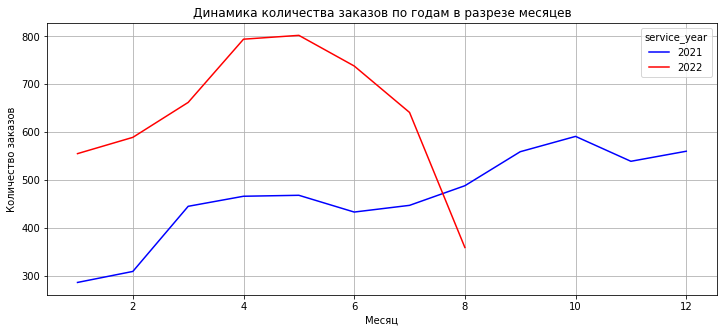

In [16]:
pivot.plot(title = 'Динамика количества заказов по годам в разрезе месяцев', 
           xlabel = 'Месяц', 
           ylabel = 'Количество заказов', 
           color = ['blue', 'red'],
           y = [2021, 2022], 
           grid=True, 
           figsize=(12, 5))
plt.show()

Видно, что от месяца к месяцу кривая каждого из готов ведёт себя примерно одинаково — небольшое увеличение заказа к февралю, затем резкий рост, пик пару месяцев и спад.

Теперь изучим доходы. Сразу визуализируем.

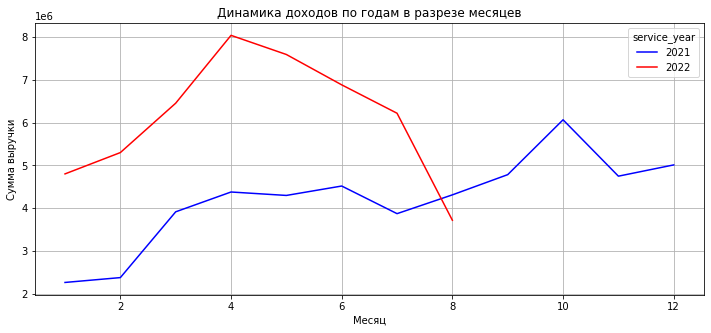

In [17]:
pivot2 = pd.pivot_table(df, index = 'service_month', 
                       columns = 'service_year', 
                       values = 'service_amount', 
                       aggfunc = 'sum')

pivot2.plot(title = 'Динамика доходов по годам в разрезе месяцев', 
           xlabel = 'Месяц', 
           ylabel = 'Сумма выручки', 
           color = ['blue', 'red'],
           y = [2021, 2022], 
           grid=True, 
           figsize=(12, 5))
plt.show()

Кривые количества заказов и доходов похожи, но имеются расхождения. Отобразим это в выводах.

**Выводы**

- с января 2021 по май 2022 наблюдается рост количества заказов, с июня 2022 по август 2022 — падение;
- с января 2021 по апрель 2022 наблюдается рост доходов, с мая 2022 по август 2022 — падение.

Как можно заметить, с мая 2022 наблюдается падение доходов, при этом в этот же месяц наблюдалось наибольшее количество клиентов. 

# Зависимость количества заказов и их суммы от пола и возраста

Изучим количество заказчиков мужчин и женщин.

<AxesSubplot:title={'center':'Распределение количества заказчиков среди мужчин и женщин'}, ylabel='insured'>

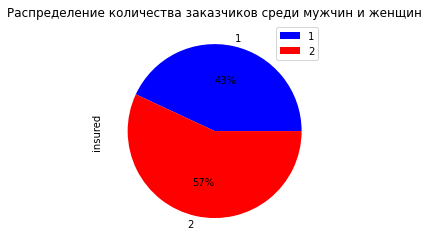

In [18]:
df.groupby('sex_id').nunique().plot(kind = 'pie', 
                                    y = 'insured', 
                                    autopct='%1.0f%%', 
                                    colors = ['blue', 'red'], 
                                    title='Распределение количества заказчиков среди мужчин и женщин') 
# посмотрим, сколько заказчиков мужчин, а сколько женщин

Мужчин — 43%, женщин — 57%.

Теперь посмотрим привязку количества заказов к возрасту. 

Посмотрим, сколько всего уникальных возрастов.

In [19]:
df['age_for_service_date'].sort_values().unique() # выводим уникальные значения возрастов по возрастанию

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 74, 75, 83], dtype=int64)

Большое количество. Разобьём на категории c помощью функции

In [20]:
def category_age(x): # создадим функцию для присвоения категории в зависимости от возраста
    if x == 0:
        return '0'
    elif 1 <= x <= 12:
        return '1-12'
    elif 13 <= x <= 17:
        return '13-17'
    elif 18 <= x <= 24:
        return '18-24'
    elif 25 <= x <= 44:
        return '25-44'
    elif 45 <= x <= 59:
        return '45-59'
    elif 60 <= x <= 74:
        return '60-74'
    else:
        return '75+'
    
df['cat_age'] = df['age_for_service_date'].apply(category_age) # добавим в таблицу столбец с категорией

In [21]:
print('Количество заказов от уникальных пользователей', df['insured'].nunique())
df.groupby('cat_age')['insured'].nunique().sort_values(ascending = False)
# выведем количество заказов в зависимости от категории возраста

Количество заказов от уникальных пользователей 4487


cat_age
25-44    3014
45-59     498
1-12      449
18-24     391
60-74      78
13-17      77
0          31
75+         2
Name: insured, dtype: int64

По полученным данным видно, что возраст больше половины заказчиков от 25 до 44 лет.

Посмотрим эти же данные, но в разбивке по полу. Заодно посмотрим доли посетителей по этим параметрам.

In [22]:
pivot3 = pd.pivot_table(df, index = 'cat_age', 
                       columns = 'sex_id', 
                       values = 'insured', 
                       aggfunc = pd.Series.nunique)
pivot3['total'] = pivot3[1] + pivot3[2] # добавим столбец с количеством заказчиков данной возрастной категории
pivot3['share_sex_1'] = round((pivot3[1] / (pivot3[1].sum() + pivot3[2].sum()) * 100), 2)
# столбец с долей заказчиков-мужчин от общего числа
pivot3['share_sex_2'] = round((pivot3[2] / (pivot3[1].sum() + pivot3[2].sum()) * 100), 2)
# столбец с долей заказчиков-женщин от общего числа
pivot3['share_cat_age'] = round((pivot3['total'] / (pivot3[1].sum() + pivot3[2].sum()) * 100), 2)
# столбец с долей заказчиков определённой возрастной категории от общего числа
pivot3.sort_values(by='share_cat_age', ascending = False)

sex_id,1,2,total,share_sex_1,share_sex_2,share_cat_age
cat_age,,,,,,
25-44,1256,1758,3014,27.67,38.72,66.39
45-59,217,281,498,4.78,6.19,10.97
1-12,236,213,449,5.20,4.69,9.89
18-24,143,248,391,3.15,5.46,8.61
60-74,42,36,78,0.93,0.79,1.72
13-17,42,35,77,0.93,0.77,1.70
0,19,12,31,0.42,0.26,0.68
75+,1,1,2,0.02,0.02,0.04


Теперь посмотрим, как ведёт себя средний чек в зависимости от возраста и пола. Для начала посмотрим общий средний чек.

In [23]:
print('Средний чек составляет', df['service_amount'].median())

Средний чек составляет 1155.0


In [24]:
pivot4 = pd.pivot_table(df, index = 'cat_age', 
                       columns = 'sex_id', 
                       values = 'service_amount', 
                       aggfunc = 'median')
pivot4
# сформируем и выведем средний чек мужчин и женщин в разбивке по возрасту

sex_id,1,2
cat_age,,
0,1313,1313
1-12,1200,1210
13-17,1140,1092
18-24,1134,1280
25-44,1170,1150
45-59,1090,1120
60-74,1090,1155
75+,1470,940


Наибольший средний чек приходится на младенцев и на пожилых мужчин, однако эти данные нельзя учитывать ввиду малого количества представителей данных возрастов.

В группе 18-24 года достаточно человек для того, чтобы посчитать средний чек на медицинские услуги девушек данной категории наибольшим (1280 рублей).

В самой популярной группе (25-44 года) средний чек у мужчин и у женщий отличается всего на 20 рублей.

Изучим доходы в зависимости от пола.

In [25]:
print(df.groupby('sex_id')['service_amount'].sum().sort_values(ascending = False))

print('Доход от мужчин составил', 
      round((df['service_amount'].loc[(df['sex_id'] == 1)].sum() / 
             df['service_amount'].sum()) * 100, 2))

print('Доход от женщин составил', 
      round((df['service_amount'].loc[(df['sex_id'] == 2)].sum() / 
             df['service_amount'].sum()) * 100, 2))

sex_id
2    61479095
1    38047323
Name: service_amount, dtype: int64
Доход от мужчин составил 38.23
Доход от женщин составил 61.77


Изучим доход в зависимости от возраста.

In [26]:
df.groupby('cat_age')['service_amount'].sum().sort_values(ascending = False)

cat_age
25-44    69013494
45-59    13668972
18-24     6824090
1-12      6115361
60-74     2256671
13-17     1087556
0          512044
75+         48230
Name: service_amount, dtype: int64

In [27]:
print('Наибольший доход от клиентов с возрастом от 25 до 44 лет, он составил', 
      round((df['service_amount'].loc[(df['cat_age'] == '25-44')].sum() / 
             df['service_amount'].sum()) * 100, 2))

Наибольший доход от клиентов с возрастом от 25 до 44 лет, он составил 69.34


**Вывод**
- клиентов мужчин — 43%, женщин — 57% (разница в 632 человека), при этом мужчины принесли 38% дохода, а женщины 62%;
- возраст 2/3 клиентов от 24 до 44 лет, при этом эта же категория принесла почти 70% дохода;
- больше всего клиентов приходится на женщин в возрасте от 25 до 44 лет (почти 39%) и на мужчин в той же возрастной категории (почти 28%);
- суммарно меньше 1% приходится на детей до 1 года и на людей с возрастом 75 лет и более.

# Анализ популярнейших услуг

Посмотрим, какими услугами пользовались больше всего.

In [28]:
df.groupby('service_name')['insured'].count().sort_values(ascending = False).head(5)
# выведем 10 популярнейших услуг медицинского центра

service_name
Прием первичный                                  6053
Прием повторный                                  4474
Взятие крови из периферической вены              4214
Общий анализ крови (лейкоцитарная форм,, СОЭ)    3189
Магнитотерапия (1 сеанс)                         2838
Name: insured, dtype: int64

Составим сводную таблицу, в которой посмотрим, как менялось количество данных услуг от месяца к месяцу в разбивке по годам.

In [29]:
pivot5 = pd.pivot_table(df.loc[((df['service_name'] == 'Прием первичный') | 
                               (df['service_name'] == 'Прием повторный') |
                               (df['service_name'] == 'Взятие крови из периферической вены') |
                               (df['service_name'] == 'Общий анализ крови (лейкоцитарная форм,, СОЭ)') |
                               (df['service_name'] == 'Магнитотерапия (1 сеанс)'))],
                        index = 'service_month',
                        columns = ['service_name', 'service_year'],
                        values = 'insured',
                        aggfunc = 'count')
pivot5

service_name  Взятие крови из периферической вены         \
service_year                                 2021   2022   
service_month                                              
1                                            93.0  240.0   
2                                           109.0  234.0   
3                                           185.0  263.0   
4                                           172.0  328.0   
5                                           179.0  302.0   
6                                           191.0  277.0   
7                                           179.0  224.0   
8                                           188.0  156.0   
9                                           208.0    NaN   
10                                          252.0    NaN   
11                                          226.0    NaN   
12                                          208.0    NaN   

service_name  Магнитотерапия (1 сеанс)         \
service_year                      2021   2022   
service_month                                   
1                                 60.0  126.0   
2                                 84.0  134.0   
3                                 89.0  222.0   
4                                161.0  219.0   
5                                119.0  238.0   
6                                124.0  203.0   
7                                 86.0  180.0   
8                                 83.0  127.0   
9                                121.0    NaN   
10                               179.0    NaN   
11                               166.0    NaN   
12                               117.0    NaN   

service_name  Общий анализ крови (лейкоцитарная форм,, СОЭ)         \
service_year                                           2021   2022   
service_month                                                        
1                                                      74.0  204.0   
2                                                      90.0  174.0   
3                                                     146.0  185.0   
4                                                     138.0  233.0   
5                                                     132.0  232.0   
6                                                     128.0  199.0   
7                                                     139.0  169.0   
8                                                     147.0  121.0   
9                                                     168.0    NaN   
10                                                    198.0    NaN   
11                                                    163.0    NaN   
12                                                    149.0    NaN   

service_name  Прием первичный Прием повторный  
service_year             2021            2021  
service_month                                  
1                       369.0           235.0  
2                       373.0           294.0  
3                       628.0           407.0  
4                       618.0           519.0  
5                       604.0           477.0  
6                       627.0           511.0  
7                       593.0           425.0  
8                       661.0           424.0  
9                       789.0           568.0  
10                      791.0           614.0  
11                        NaN             NaN  
12                        NaN             NaN

Видим, что первичный и повторный приёмы были до октября 2021 года. По крайней мере с такими названиями.

Изучим данный вопрос подробнее.

Для начала посмотрим, есть ли услуги с названиями, в которых содержатся слова "первичный" и "повторный".

In [30]:
df['service_name'][df['service_name'].str.contains(r'\bпервичный')].unique() # выведем уникальные значения первичных приёмов

array(['Прием первичный', 'Прием рефлексотерапевта первичный',
       'Прием мануального терапевта первичный',
       'Прием хирурга, первичный', 'Прием гинеколога, первичный',
       'Прием отоларинголога, первичный', 'Прием трапевта, первичный',
       'Прием уролога, первичный', 'Прием гастроэнтеролога, первичный',
       'Прием невролога, первичный', 'Прием педиатра,  первичный',
       'Прием офтальмолога,  первичный', 'Прием онколога, первичный',
       'Прием физиотерапевта, первичный',
       'Прием мануального терапевта, первичный',
       'Прием травматолога-ортопеда, первичный',
       'Прием аллерголога, первичный', 'Прием эндокринолога, первичный',
       'Прием ревматолога, первичный', 'Прием дерматолога, первичный',
       'Прием кардиолога, первичный', 'Прием проктолога, первичный',
       'Прием пульмонолога, первичный',
       'Прием рефлексотерапевта, первичный', 'Прием нефролога, первичный',
       'Прием анестезиолога, первичный', 'Прием логопеда, первичный',
     

In [31]:
df['service_name'][df['service_name'].str.contains(r'\bповторный')].unique() # выведем уникальные значения повторных приёмов

array(['Прием повторный', 'Прием рефлексотерапевта повторный',
       'Прием мануального терапевта повторный',
       'Прием мануального терапевта, повторный',
       'Прием травматолога-ортопеда, повторный',
       'Прием уролога, повторный', 'Прием терапевта , повторный',
       'Прием гинеколога, повторный', 'Прием эндокринолога, повторный',
       'Прием педиатра, повторный', 'Прием хирурга, повторный',
       'Прием гастроэнтеролога, повторный', 'Прием онколога, повторный',
       'Прием невролога, повторный', 'Прием отоларинголога, повторный',
       'Прием физиотерапевта, повторный', 'Прием дерматолога, повторный',
       'Прием кардиолога, повторный', 'Прием пульмонолога, повторный',
       'Прием офтальмолога, повторный', 'Прием аллерголога, повторный',
       'Прием рефлексотерапевта, повторный',
       'Прием ревматолога, повторный', 'Прием проктолога, повторный',
       'Прием нефролога, повторный'], dtype=object)

Скорее всего, с ноября 2021 года решили дать более узкое название приёмам. 

Теперь создадим столбец, в котором поменяем названия услуг (везде, где содержится "первичный", заменим на "Приём первичный", и также сделаем с повторными приёмами).

In [32]:
df['service_name_upd'] = df['service_name'] # создадим дополнительный столбец

def replace_values(wrong_values, correct_value): 
    # на вход функции подаются список заменяемых значений и строка с нужным значением
    for wrong_value in wrong_values: 
        # перебираем заменяемые значения
        df['service_name_upd'] = df['service_name_upd'].replace(wrong_value, correct_value) 
        # и для каждого заменяемого значения вызываем метод replace()

dup_1 = ['Прием первичный', 'Прием рефлексотерапевта первичный',
       'Прием мануального терапевта первичный',
       'Прием хирурга, первичный', 'Прием гинеколога, первичный',
       'Прием отоларинголога, первичный', 'Прием трапевта, первичный',
       'Прием уролога, первичный', 'Прием гастроэнтеролога, первичный',
       'Прием невролога, первичный', 'Прием педиатра,  первичный',
       'Прием офтальмолога,  первичный', 'Прием онколога, первичный',
       'Прием физиотерапевта, первичный',
       'Прием мануального терапевта, первичный',
       'Прием травматолога-ортопеда, первичный',
       'Прием аллерголога, первичный', 'Прием эндокринолога, первичный',
       'Прием ревматолога, первичный', 'Прием дерматолога, первичный',
       'Прием кардиолога, первичный', 'Прием проктолога, первичный',
       'Прием пульмонолога, первичный',
       'Прием рефлексотерапевта, первичный', 'Прием нефролога, первичный',
       'Прием анестезиолога, первичный', 'Прием логопеда, первичный',
       'Прием терапевта, первичный']
name_1 = 'Приём первичный'

dup_2 = ['Прием повторный', 'Прием рефлексотерапевта повторный',
       'Прием мануального терапевта повторный',
       'Прием мануального терапевта, повторный',
       'Прием травматолога-ортопеда, повторный',
       'Прием уролога, повторный', 'Прием терапевта , повторный',
       'Прием гинеколога, повторный', 'Прием эндокринолога, повторный',
       'Прием педиатра, повторный', 'Прием хирурга, повторный',
       'Прием гастроэнтеролога, повторный', 'Прием онколога, повторный',
       'Прием невролога, повторный', 'Прием отоларинголога, повторный',
       'Прием физиотерапевта, повторный', 'Прием дерматолога, повторный',
       'Прием кардиолога, повторный', 'Прием пульмонолога, повторный',
       'Прием офтальмолога, повторный', 'Прием аллерголога, повторный',
       'Прием рефлексотерапевта, повторный',
       'Прием ревматолога, повторный', 'Прием проктолога, повторный',
       'Прием нефролога, повторный']

name_2 = 'Приём повторный'

replace_values(dup_1, name_1) # вызов функции
replace_values(dup_2, name_2) # вызов функции

In [33]:
print('Доля первичных и повторных приёмов относительно всех услуг составила', 
      round(((df['service_amount'].loc[(df['service_name_upd'] == 'Приём первичный')].count() + 
               df['service_amount'].loc[(df['service_name_upd'] == 'Приём повторный')].count()) / 
             df['service_amount'].count()) * 100, 2))

Доля первичных и повторных приёмов относительно всех услуг составила 30.44


Почти треть оказанных услуг приходится на первичные и повторные приёмы.

Теперь создадим сводную таблицу, в которой отобразим количество первичных и повторных приёмов в разрезе месяцев по годам.

In [34]:
pivot6 = pd.pivot_table(df.loc[((df['service_name_upd'] == 'Приём первичный') | 
                               (df['service_name_upd'] == 'Приём повторный'))],
                        index = 'service_month',
                        columns = ['service_name_upd', 'service_year'],
                        values = 'insured',
                        aggfunc = 'count')
pivot6

service_name_upd Приём первичный         Приём повторный       
service_year                2021    2022            2021   2022
service_month                                                  
1                          380.0   784.0           245.0  473.0
2                          380.0   857.0           298.0  541.0
3                          643.0   946.0           413.0  663.0
4                          635.0  1212.0           531.0  904.0
5                          622.0  1122.0           495.0  875.0
6                          644.0  1023.0           521.0  775.0
7                          612.0   894.0           432.0  650.0
8                          679.0   523.0           439.0  361.0
9                          803.0     NaN           578.0    NaN
10                         825.0     NaN           638.0    NaN
11                         707.0     NaN           513.0    NaN
12                         743.0     NaN           598.0    NaN

Визуализируем данную таблицу. Покажем всё на одном графике, разделим виды приёмов контрастными цветами.

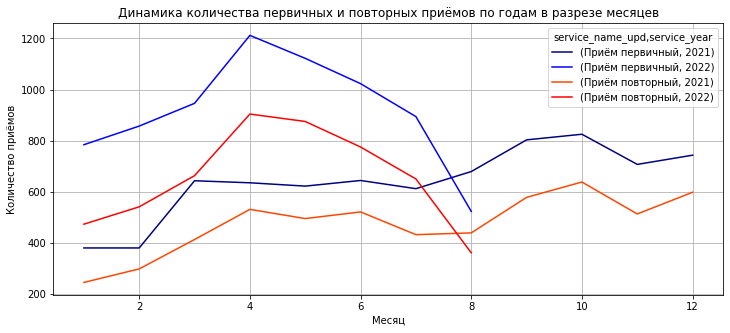

In [35]:
pivot6.plot(title = 'Динамика количества первичных и повторных приёмов по годам в разрезе месяцев', 
           xlabel = 'Месяц', 
           ylabel = 'Количество приёмов', 
            color = ['navy', 'blue', 'orangered', 'red'],
           y = ['Приём первичный', 'Приём повторный'], 
           grid=True, 
           figsize=(12, 5))
plt.show()

По графике видно, что кривые и первичных, и повторных визитов разных годов ведут себя одинаково до апреля, при этом данные 2022 года больше данных 2021, а затем происходит уменьшение количества приёмов. В авгусе 2022 года наблюдается единственное превышение количества приёмов 2021 года относительно 2022 года.

Попробуем связать гипотезу с возможным увеличением цены на данную услугу. Проверим, менялась ли цена на услуги со временем.

In [36]:
pivot6 = pd.pivot_table(df.loc[((df['service_name_upd'] == 'Приём первичный') | 
                               (df['service_name_upd'] == 'Приём повторный'))],
                        index = 'service_month',
                        columns = ['service_name_upd', 'service_year'],
                        values = 'service_amount',
                        aggfunc = 'median')
pivot6

service_name_upd Приём первичный         Приём повторный        
service_year                2021    2022            2021    2022
service_month                                                   
1                         1470.0  1540.0          1313.0  1380.0
2                         1470.0  1540.0          1313.0  1380.0
3                         1470.0  1540.0          1313.0  1380.0
4                         1470.0  1540.0          1313.0  1380.0
5                         1470.0  1540.0          1313.0  1380.0
6                         1470.0  1540.0          1313.0  1380.0
7                         1470.0  1620.0          1313.0  1450.0
8                         1470.0  1620.0          1313.0  1450.0
9                         1470.0     NaN          1313.0     NaN
10                        1540.0     NaN          1380.0     NaN
11                        1540.0     NaN          1380.0     NaN
12                        1540.0     NaN          1380.0     NaN

Как можно заметить, за рассматриваемый период цена поменялась дважды, приём последний подъём цены приходится на тот период, когда происходит резкое снижение количества приёмов.

Посмотрим, какая услуга принесла больше всего денег в компанию.

In [37]:
df.groupby('service_name_upd')['service_amount'].sum().sort_values(ascending = False).head(5)

service_name_upd
Приём первичный                                  22892210
Приём повторный                                  14908196
Магнитотерапия (1 сеанс)                          3056280
Комплексная мануальная терапия                    2357560
Общий анализ крови (лейкоцитарная форм,, СОЭ)     2306416
Name: service_amount, dtype: int64

In [38]:
print('Доход с первичных и повторных приёмов составил', 
      round(((df['service_amount'].loc[(df['service_name_upd'] == 'Приём первичный')].sum() + 
               df['service_amount'].loc[(df['service_name_upd'] == 'Приём повторный')].sum()) / 
             df['service_amount'].sum()) * 100, 2))

Доход с первичных и повторных приёмов составил 37.98


Неудивительно, но первичные и повторные приёмы намного больше принесли денег в компанию, чем ближайшие по выручке услуги (в сумме почти 38%).

Посмотрим, как вел себя доход с приёмов в течение двух лет.

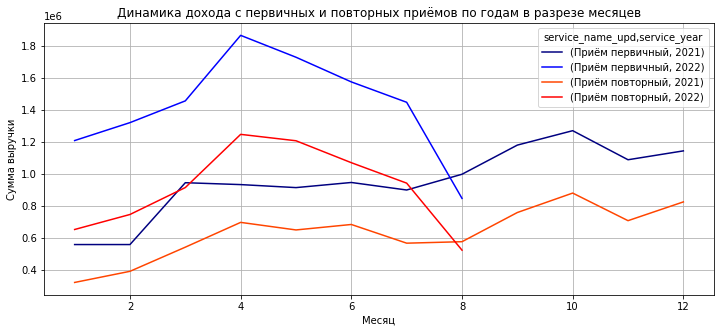

In [39]:
pivot7 = pd.pivot_table(df.loc[((df['service_name_upd'] == 'Приём первичный') | 
                               (df['service_name_upd'] == 'Приём повторный'))],
                        index = 'service_month',
                        columns = ['service_name_upd', 'service_year'],
                        values = 'service_amount',
                        aggfunc = 'sum')
pivot7.plot(title = 'Динамика дохода с первичных и повторных приёмов по годам в разрезе месяцев', 
           xlabel = 'Месяц', 
           ylabel = 'Сумма выручки', 
            color = ['navy', 'blue', 'orangered', 'red'],
           y = ['Приём первичный', 'Приём повторный'], 
           grid=True, 
           figsize=(12, 5))
plt.show()

Возможно, в июне компания поняла, что они терпят убытки относительно крайне успешного апреля, и решила немного поднять прайс, тем самым уровняв спад количества клиентов и сумму дохода, однако это сильно усугубило ситуацию.

**Вывод**

- почти треть оказанных услуг приходится на первичный и повторный приёмы, при этом доход с них — 38%;
- наименование услуг приёмов поменялось в октябре 2021 года;
- стоимость первичного и повторного приёмов повышалась дважды — в октябре 2021 и в июле 2022;
- с июля 2022 наблюдается падение дохода.

# Общий вывод и рекомендации

- в мае 2022 наблюдался пик количества заказчиков, в апреле 2022 — наибольший доход;
- основной заказчик — женщины (57% заказов и 62% дохода); 
- 2/3 заказчиков в возрасте от 25 до 44 лет;
- средний чек — 1155 рублей;
- наиболее востребованные услуги — первичный и вторичный приёмы (более 30% заказов и 38% дохода).

В мае наблюдалась аномальная картина — наибольшее количество клиентов, при этом максимальный доход был месяцем ранее. Скорее всего, это послужило поводом поднятия прайса, однако идея не увенчалась успехом — количество заказчиков резко начало сокращаться. На основании этого можно посоветовать вернуться к прайсу до его последнего увеличения и в течение пары-тройки месяцев наблюдать за изменением количества клиентов и суммы дохода.